In [12]:
import folium

In [13]:
m = folium.Map([13.77, 100.58])
m

In [3]:
m.save('mymap.html')

In [4]:
import geopandas as gpd

In [7]:
data = gpd.read_file("C:\\Users\\HP\\Desktop\\DOAE spatial data\\ภัยน้ำท่วม\\area2.shp")

In [9]:
data.head()

,gid,fid_flood,id,area,repeating,label,fid_admin_,tambon_idn,amphoe_idn,prov_code,shape_leng,shape_area,geometry
0,1,71367,71367,1.865897,1,0,208,102302,1023,10,0.000080,1.559340e-10,"POLYGON ((100.35238 13.68191, 100.35236 13.681..."
1,2,71368,71368,23268.012893,1,0,208,102302,1023,10,0.007525,1.944576e-06,"POLYGON ((100.35774 13.68156, 100.35794 13.681..."
2,3,71369,71369,1390.640398,2,1,2619,120306,1203,12,0.001533,1.162981e-07,"POLYGON ((100.31740 13.83535, 100.31732 13.835..."
3,4,71370,71370,1693.391256,2,1,2618,120305,1203,12,0.001711,1.416168e-07,"POLYGON ((100.32008 13.83548, 100.32014 13.835..."
4,5,71371,71371,5176.687777,2,1,2619,120306,1203,12,0.002867,4.329228e-07,"POLYGON ((100.31451 13.83495, 100.31437 13.834..."


In [11]:
data.shape

(563996, 13)

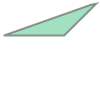

In [10]:
data.iloc[0].geometry

In [14]:
folium.GeoJson(data[:10]).add_to(m)

In [15]:
m

In [16]:
m.save('mymap.html')

In [17]:
data.iloc[0].geometry.centroid.coords.xy

(array('d', [100.3523806215463]), array('d', [13.681909895687259]))

In [50]:
loc = []
for ind, row in data[:1000].iterrows():
    x, y = row.geometry.centroid.coords.xy
    loc.append([y[0], x[0]])

In [51]:
from folium.plugins import FastMarkerCluster

In [52]:
m = folium.Map([13.77, 100.58])
c = FastMarkerCluster(loc)
m.add_child(c)

In [53]:
data2 = gpd.read_file("C:\\Users\\HP\\Desktop\\DOAE spatial data\\ภัยน้ำท่วม\\area2.shp")

In [63]:
loc2 = []
for ind, row in data2[:500].iterrows():
    x, y = row.geometry.centroid.coords.xy
    loc2.append([y[0], x[0]])

In [64]:
c2 = FastMarkerCluster(loc2)

In [65]:
m.add_child(c2)

In [66]:
folium.LayerControl().add_to(m)

In [67]:
m

In [70]:
m = folium.Map([13.77, 100.58])
c = FastMarkerCluster(loc, name='Area 1')
m.add_child(c)
c2 = FastMarkerCluster(loc2, name='Area 2')
m.add_child(c2)
folium.LayerControl().add_to(m)
folium.LatLngPopup().add_to(m)

In [71]:
m

In [72]:
m.save('mymap.html')